In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definiowanie sieci neuronowej
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden = [tf.keras.layers.Dense(20, activation='tanh') for _ in range(4)]
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, x):
        for layer in self.hidden:
            x = layer(x)
        return self.output_layer(x)

# Definiowanie funkcji straty
def loss(model, x):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y_pred = model(x)
        y_x = tape.gradient(y_pred, x)
        y_xx = tape.gradient(y_x, x)
        pde_residual = y_xx + y_pred  # Przykładowe równanie różniczkowe: u'' + u = 0
    boundary_residual = model(tf.constant([[0.0]])) - tf.constant([[1.0]])
    return tf.reduce_mean(tf.square(pde_residual)) + tf.square(boundary_residual)

# Trening sieci
model = PINN()
optimizer = tf.keras.optimizers.Adam()

x_train = np.linspace(0, 1, 100).reshape(-1, 1)

for epoch in range(1000):
    with tf.GradientTape() as tape:
        current_loss = loss(model, tf.constant(x_train, dtype=tf.float32))
    grads = tape.gradient(current_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss.numpy()}")


Epoch 0: Loss = [[1.0001687]]
Epoch 100: Loss = [[0.00173032]]
Epoch 200: Loss = [[0.00111521]]
Epoch 300: Loss = [[0.00087933]]
Epoch 400: Loss = [[0.00059125]]
Epoch 500: Loss = [[0.00026887]]
Epoch 600: Loss = [[5.7009944e-05]]
Epoch 700: Loss = [[1.3966772e-05]]
Epoch 800: Loss = [[1.1963106e-05]]
Epoch 900: Loss = [[1.168561e-05]]


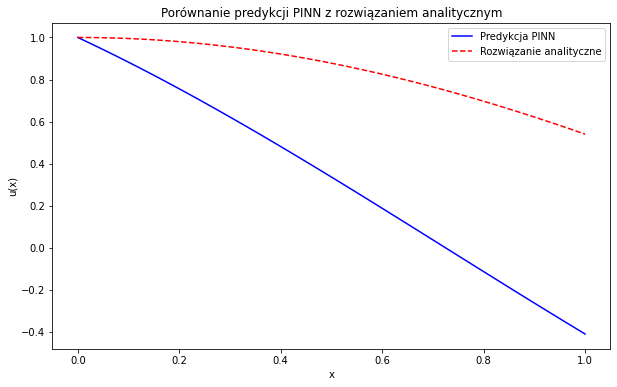

In [3]:
import matplotlib.pyplot as plt

# Generowanie danych wejściowych do predykcji
x_test = np.linspace(0, 1, 100).reshape(-1, 1)

# Uzyskiwanie predykcji modelu
y_pred = model(tf.constant(x_test, dtype=tf.float32)).numpy()

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_pred, label='Predykcja PINN', color='b')

# Jeśli znane jest rozwiązanie analityczne, można je również narysować
# np. dla równania u'' + u = 0 rozwiązaniem może być u(x) = cos(x)
y_true = np.cos(x_test)
plt.plot(x_test, y_true, label='Rozwiązanie analityczne', linestyle='dashed', color='r')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Porównanie predykcji PINN z rozwiązaniem analitycznym')
plt.show()

Epoch 0: Loss = [[1.0026037]]
Epoch 100: Loss = [[0.00170677]]
Epoch 200: Loss = [[0.00080446]]
Epoch 300: Loss = [[3.6612837e-05]]
Epoch 400: Loss = [[2.4737667e-05]]
Epoch 500: Loss = [[2.1795753e-05]]
Epoch 600: Loss = [[2.0449448e-05]]
Epoch 700: Loss = [[1.929011e-05]]
Epoch 800: Loss = [[1.8165716e-05]]
Epoch 900: Loss = [[3.965319e-05]]
Epoch 1000: Loss = [[1.6151096e-05]]
Epoch 1100: Loss = [[1.5192657e-05]]
Epoch 1200: Loss = [[1.4544711e-05]]
Epoch 1300: Loss = [[1.3591587e-05]]
Epoch 1400: Loss = [[1.2780149e-05]]
Epoch 1500: Loss = [[0.00089863]]
Epoch 1600: Loss = [[1.1647675e-05]]
Epoch 1700: Loss = [[1.0901773e-05]]
Epoch 1800: Loss = [[1.0224717e-05]]
Epoch 1900: Loss = [[2.3371258e-05]]
Epoch 2000: Loss = [[9.4055285e-06]]
Epoch 2100: Loss = [[8.79291e-06]]
Epoch 2200: Loss = [[8.212954e-06]]
Epoch 2300: Loss = [[8.634747e-06]]
Epoch 2400: Loss = [[7.8423245e-06]]
Epoch 2500: Loss = [[7.292259e-06]]
Epoch 2600: Loss = [[0.00018763]]
Epoch 2700: Loss = [[7.1765953e-06]]

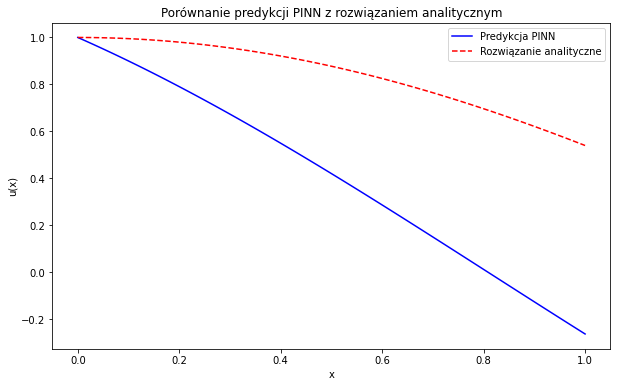

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Definiowanie sieci neuronowej
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden = [tf.keras.layers.Dense(50, activation='tanh') for _ in range(6)]
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, x):
        for layer in self.hidden:
            x = layer(x)
        return self.output_layer(x)

# Definiowanie funkcji straty
def loss(model, x):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y_pred = model(x)
        y_x = tape.gradient(y_pred, x)
        y_xx = tape.gradient(y_x, x)
        pde_residual = y_xx + y_pred  # Przykładowe równanie różniczkowe: u'' + u = 0
    boundary_residual = model(tf.constant([[0.0]])) - tf.constant([[1.0]])
    return tf.reduce_mean(tf.square(pde_residual)) + tf.square(boundary_residual)

# Trening sieci
model = PINN()
optimizer = tf.keras.optimizers.Adam()

x_train = np.linspace(0, 1, 100).reshape(-1, 1)

for epoch in range(5000):
    with tf.GradientTape() as tape:
        current_loss = loss(model, tf.constant(x_train, dtype=tf.float32))
    grads = tape.gradient(current_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss.numpy()}")

# Generowanie danych wejściowych do predykcji
x_test = np.linspace(0, 1, 100).reshape(-1, 1)

# Uzyskiwanie predykcji modelu
y_pred = model(tf.constant(x_test, dtype=tf.float32)).numpy()

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_pred, label='Predykcja PINN', color='b')

# Znane rozwiązanie analityczne dla równania u'' + u = 0
y_true = np.cos(x_test)
plt.plot(x_test, y_true, label='Rozwiązanie analityczne', linestyle='dashed', color='r')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Porównanie predykcji PINN z rozwiązaniem analitycznym')
plt.show()

Epoch 0: Loss = [[1.3019811]]
Epoch 100: Loss = [[0.00068177]]
Epoch 200: Loss = [[0.00011825]]
Epoch 300: Loss = [[5.1678442e-05]]
Epoch 400: Loss = [[3.203981e-05]]
Epoch 500: Loss = [[1.475903e-05]]
Epoch 600: Loss = [[7.934777e-06]]
Epoch 700: Loss = [[5.3558597e-05]]
Epoch 800: Loss = [[8.034293e-06]]
Epoch 900: Loss = [[7.0125125e-06]]


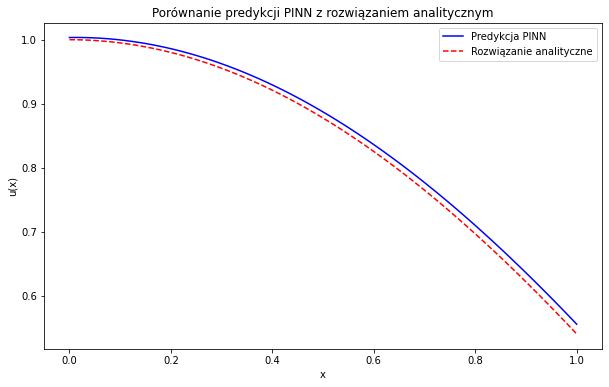

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Definiowanie sieci neuronowej
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden = [tf.keras.layers.Dense(100, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)) for _ in range(6)]
        self.output_layer = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01))

    def call(self, x):
        for layer in self.hidden:
            x = layer(x)
        return self.output_layer(x)

# Definiowanie funkcji straty
def loss(model, x):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y_pred = model(x)
        y_x = tape.gradient(y_pred, x)
        y_xx = tape.gradient(y_x, x)
        pde_residual = y_xx + y_pred  # Przykładowe równanie różniczkowe: u'' + u = 0
    boundary_residual_0 = model(tf.constant([[0.0]], dtype=tf.float32)) - tf.constant([[1.0]], dtype=tf.float32)
    boundary_residual_1 = model(tf.constant([[1.0]], dtype=tf.float32)) - tf.constant([[np.cos(1.0)]], dtype=tf.float32)
    return tf.reduce_mean(tf.square(pde_residual)) + tf.square(boundary_residual_0) + tf.square(boundary_residual_1)

# Trening sieci
model = PINN()
optimizer = tf.keras.optimizers.Adam()

x_train = np.linspace(0, 1, 100).reshape(-1, 1).astype(np.float32)

for epoch in range(1000):
    with tf.GradientTape() as tape:
        current_loss = loss(model, tf.constant(x_train, dtype=tf.float32))
    grads = tape.gradient(current_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss.numpy()}")

# Generowanie danych wejściowych do predykcji
x_test = np.linspace(0, 1, 100).reshape(-1, 1).astype(np.float32)

# Uzyskiwanie predykcji modelu
y_pred = model(tf.constant(x_test, dtype=tf.float32)).numpy()

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_pred, label='Predykcja PINN', color='b')

# Znane rozwiązanie analityczne dla równania u'' + u = 0
y_true = np.cos(x_test)
plt.plot(x_test, y_true, label='Rozwiązanie analityczne', linestyle='dashed', color='r')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Porównanie predykcji PINN z rozwiązaniem analitycznym')
plt.show()

Epoch 0: Loss = [[1.2576479]]
Epoch 100: Loss = [[0.00200107]]
Epoch 200: Loss = [[0.00442143]]
Epoch 300: Loss = [[8.050021e-05]]
Epoch 400: Loss = [[5.1358253e-05]]
Epoch 500: Loss = [[9.5800744e-05]]
Epoch 600: Loss = [[1.7102615e-05]]
Epoch 700: Loss = [[7.17485e-06]]
Epoch 800: Loss = [[3.4421344e-06]]
Epoch 900: Loss = [[1.0169739e-05]]


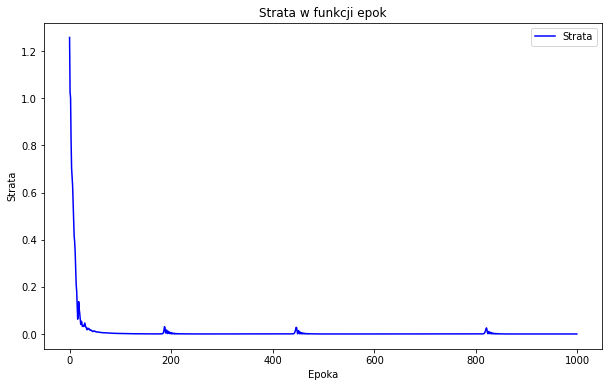

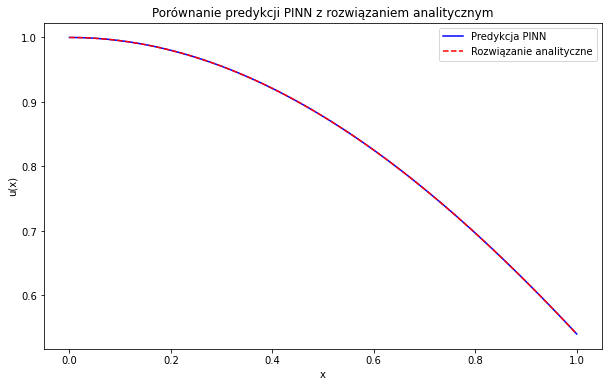

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Definiowanie sieci neuronowej
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden = [tf.keras.layers.Dense(100, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)) for _ in range(6)]
        self.output_layer = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01))

    def call(self, x):
        for layer in self.hidden:
            x = layer(x)
        return self.output_layer(x)

# Definiowanie funkcji straty
def loss(model, x):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y_pred = model(x)
        y_x = tape.gradient(y_pred, x)
        y_xx = tape.gradient(y_x, x)
        pde_residual = y_xx + y_pred  # Przykładowe równanie różniczkowe: u'' + u = 0
    boundary_residual_0 = model(tf.constant([[0.0]], dtype=tf.float32)) - tf.constant([[1.0]], dtype=tf.float32)
    boundary_residual_1 = model(tf.constant([[1.0]], dtype=tf.float32)) - tf.constant([[np.cos(1.0)]], dtype=tf.float32)
    return tf.reduce_mean(tf.square(pde_residual)) + tf.square(boundary_residual_0) + tf.square(boundary_residual_1)

# Trening sieci
model = PINN()
optimizer = tf.keras.optimizers.Adam()

x_train = np.linspace(0, 1, 100).reshape(-1, 1).astype(np.float32)

# Listy do przechowywania strat
losses = []

for epoch in range(1000):
    with tf.GradientTape() as tape:
        current_loss = loss(model, tf.constant(x_train, dtype=tf.float32))
    grads = tape.gradient(current_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    losses.append(current_loss.numpy().item())
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss.numpy()}")

# Wizualizacja strat w funkcji epok
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Strata', color='b')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.title('Strata w funkcji epok')
plt.legend()
plt.show()

# Generowanie danych wejściowych do predykcji
x_test = np.linspace(0, 1, 100).reshape(-1, 1).astype(np.float32)

# Uzyskiwanie predykcji modelu
y_pred = model(tf.constant(x_test, dtype=tf.float32)).numpy()

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_pred, label='Predykcja PINN', color='b')

# Znane rozwiązanie analityczne dla równania u'' + u = 0
y_true = np.cos(x_test)
plt.plot(x_test, y_true, label='Rozwiązanie analityczne', linestyle='dashed', color='r')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Porównanie predykcji PINN z rozwiązaniem analitycznym')
plt.show()

Epoch 0: Loss = 0.0005074293585494161
Epoch 100: Loss = 2.508053330529947e-05
Epoch 200: Loss = 9.07627327251248e-06
Epoch 300: Loss = 4.392376013129251e-06
Epoch 400: Loss = 2.0378315639391076e-06
Epoch 500: Loss = 8.655592296236136e-07
Epoch 600: Loss = 3.688138292545773e-07
Epoch 700: Loss = 1.8804934143190621e-07
Epoch 800: Loss = 1.27247972159239e-07
Epoch 900: Loss = 1.0449996779016146e-07


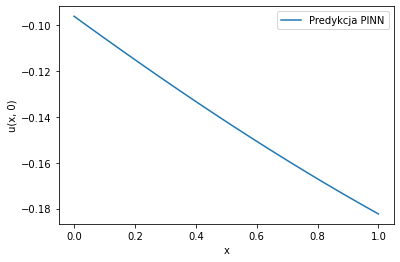

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Definicja modelu PINN
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(20, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(20, activation='tanh')
        self.dense3 = tf.keras.layers.Dense(1, activation=None)

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

# Definicja funkcji straty
def loss(model, x, t):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch([x, t])
        u = model(tf.concat([x, t], 1))
        u_x = tape.gradient(u, x)
        u_t = tape.gradient(u, t)
    u_xx = tape.gradient(u_x, x)
    del tape
    pde_residual = u_t - alpha * u_xx
    return tf.reduce_mean(tf.square(pde_residual))

# Inicjalizacja modelu i optymalizatora
model = PINN()
optimizer = tf.keras.optimizers.Adam()

# Dane treningowe (przykładowe)
alpha = 0.01
x_train = np.random.rand(1000, 1)
t_train = np.random.rand(1000, 1)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
t_train = tf.convert_to_tensor(t_train, dtype=tf.float32)

# Trening modelu
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        current_loss = loss(model, x_train, t_train)
    grads = tape.gradient(current_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss.numpy()}")

# Wizualizacja wyników (przykładowa)
x_test = np.linspace(0, 1, 100).reshape(-1, 1)
t_test = np.zeros_like(x_test)
u_pred = model(tf.concat([x_test, t_test], 1)).numpy()

plt.plot(x_test, u_pred, label='Predykcja PINN')
plt.xlabel('x')
plt.ylabel('u(x, 0)')
plt.legend()
plt.show()

# Artykuł z GitHuba

In [2]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

Initial cost: 367.01
Final cost: 0.0666807
Max absolute difference: 0.0437499


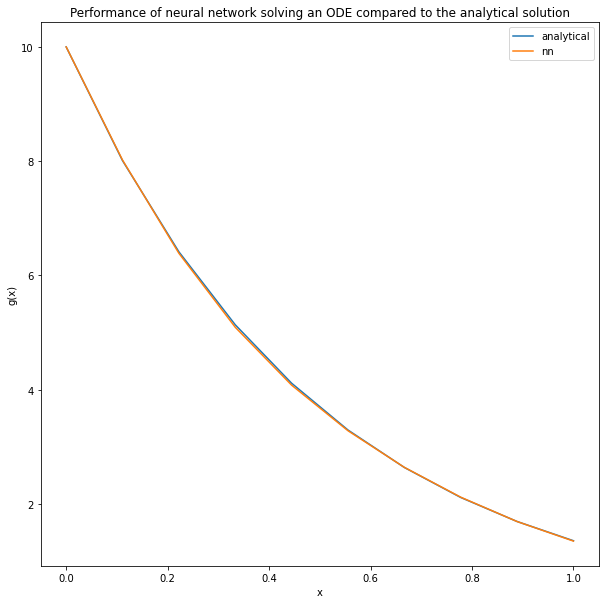

In [3]:
%matplotlib inline

#import autograd.numpy as np
#from autograd import grad, elementwise_grad
#import autograd.numpy.random as npr
#from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Assuming one input, hidden, and output layer
def neural_network(params, x):

    # Find the weights (including and biases) for the hidden and output layer.
    # Assume that params is a list of parameters for each layer.
    # The biases are the first element for each array in params,
    # and the weights are the remaning elements in each array in params.

    w_hidden = params[0]
    w_output = params[1]

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    ## Hidden layer:

    # Add a row of ones to include bias
    x_input = np.concatenate((np.ones((1,num_values)), x_input ), axis = 0)

    z_hidden = np.matmul(w_hidden, x_input)
    x_hidden = sigmoid(z_hidden)

    ## Output layer:

    # Include bias:
    x_hidden = np.concatenate((np.ones((1,num_values)), x_hidden ), axis = 0)

    z_output = np.matmul(w_output, x_hidden)
    x_output = z_output

    return x_output

# The trial solution using the deep neural network:
def g_trial(x,params, g0 = 10):
    return g0 + x*neural_network(params,x)

# The right side of the ODE:
def g(x, g_trial, gamma = 2):
    return -gamma*g_trial

# The cost function:
def cost_function(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial(x,P)

    # Find the derivative w.r.t x of the neural network
    d_net_out = elementwise_grad(neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial,0)(x,P)

    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# Solve the exponential decay ODE using neural network with one input, hidden, and output layer
def solve_ode_neural_network(x, num_neurons_hidden, num_iter, lmb):
    ## Set up initial weights and biases

    # For the hidden layer
    p0 = npr.randn(num_neurons_hidden, 2 )

    # For the output layer
    p1 = npr.randn(1, num_neurons_hidden + 1 ) # +1 since bias is included

    P = [p0, p1]

    print('Initial cost: %g'%cost_function(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of two arrays;
        # one for the gradient w.r.t P_hidden and
        # one for the gradient w.r.t P_output
        cost_grad =  cost_function_grad(P, x)

        P[0] = P[0] - lmb * cost_grad[0]
        P[1] = P[1] - lmb * cost_grad[1]

    print('Final cost: %g'%cost_function(P, x))

    return P

def g_analytic(x, gamma = 2, g0 = 10):
    return g0*np.exp(-gamma*x)

# Solve the given problem
if __name__ == '__main__':
    # Set seed such that the weight are initialized
    # with same weights and biases for every run.
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    N = 10
    x = np.linspace(0, 1, N)

    ## Set up the initial parameters
    num_hidden_neurons = 10
    num_iter = 10000
    lmb = 0.001

    # Use the network
    P = solve_ode_neural_network(x, num_hidden_neurons, num_iter, lmb)

    # Print the deviation from the trial solution and true solution
    res = g_trial(x,P)
    res_analytical = g_analytic(x)

    print('Max absolute difference: %g'%np.max(np.abs(res - res_analytical)))

    # Plot the results
    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Example neural network definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Loss function (mean squared error)
loss_fn = nn.MSELoss()

# Example training loop
def train(model, optimizer, X_train, Y_train, X_val, Y_val, epochs=1000):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = loss_fn(output, Y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Validation loss
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = loss_fn(val_output, Y_val)
            val_losses.append(val_loss.item())

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

    return train_losses, val_losses

# Example data
X_train = torch.linspace(0, 1, 100).view(-1, 1)
Y_train = torch.sin(X_train * 3.14)
X_val = torch.linspace(0, 1, 100).view(-1, 1)
Y_val = torch.sin(X_val * 3.14)

# Initialize model, optimizer
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses, val_losses = train(model, optimizer, X_train, Y_train, X_val, Y_val)

Epoch 0: Train Loss: 0.7113568782806396, Validation Loss: 0.5898652672767639
Epoch 100: Train Loss: 0.08835263550281525, Validation Loss: 0.0883018895983696
Epoch 200: Train Loss: 0.07838119566440582, Validation Loss: 0.07820172607898712
Epoch 300: Train Loss: 0.04102271422743797, Validation Loss: 0.04044090211391449
Epoch 400: Train Loss: 0.003289230400696397, Validation Loss: 0.0032139241229742765
Epoch 500: Train Loss: 0.0011234870180487633, Validation Loss: 0.0011139127891510725
Epoch 600: Train Loss: 0.0005893118213862181, Validation Loss: 0.0005862476537004113
Epoch 700: Train Loss: 0.0003302418044768274, Validation Loss: 0.0003281624522060156
Epoch 800: Train Loss: 0.0001841107732616365, Validation Loss: 0.00018317520152777433
Epoch 900: Train Loss: 0.0001165159119409509, Validation Loss: 0.00011602239101193845


In [62]:
from autograd import elementwise_grad, grad

def f(x):
    return x**2

In [63]:
def f(X):
    return sum(X)

In [52]:
grad(f)(2.0, 1)

4.0

In [70]:
X = np.array([1.0, 2.0])
grad(f)(X)

array([1., 1.])

In [68]:
X = np.array([1.0, 2.0])
sum(X)

3.0

In [78]:
def f(X):
    return [sum(X[0]), sum(X[1])]

In [80]:
X = [[1.0, 2.0], [3.0, 4.0]]
elementwise_grad(f)(X)

c:\Users\szymo\AppData\Local\Programs\Python\Python38\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


[[array(0.), array(0.)], [array(0.), array(0.)]]

# Moje kody

In [7]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
from matplotlib import pyplot as plt

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def neural_network(x, weights):
    for W in weights:
        np.hstack([1, x])
        x = sigmoid(W @ x)
    return x

def g_t(x, weights):
    g0 = 1
    return g0 + x * neural_network(x, weights)

def cost(x, g_t, equation, weights):
    return equation(x, g_t, weights)**2

def 

In [6]:
import numpy as np

In [12]:
X = np.array([2, 3, 4])
np.hstack([1, X])

array([1, 2, 3, 4])

In [27]:
X = np.array([1, 2, 3])
W = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
W @ X

array([ 6, 12, 18])